# PROJECT ON INX FUTURE INC EMPLOYEE PERFORMANCE ANALYSIS:

## Business Case: INX Future Inc Employee Performance rating based on the given features:

### DATA PRE-PROCESSING & FEATURE SELECTION:

### DATA PRE-PROCESSING SUMMARY:
- Loading the dataset
- Basic checks of the data
- Checking the data types of the data
- Statistical checking of the data
- Checking duplicates
- Checking missing values
- Checking distributions
- Checking outliers
- Handling outliers
- Converting the multiclass target into binary target features.
- Categorical encoding: Checking the value counts of the features, Label Encoding
- Feature Transformation
- Feature scaling using MinMaxScaler
- Checking for feature correlation
- Feature Importance.
- Saving the pre-processed model.

### Libraries used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data= pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### Basic Checks of the data

In [3]:
#viewing first five rows
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
#viewing last five rows
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [5]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [6]:
#checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

### Checking the data types of the dataset-
- There are total 28 features in this dataset.
- Out of 28 features,9 features are of the data type 'object' while the rest of the features are of the data type 'int64'.

In [7]:
#checking data-types
data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

### Statistical checking of the data

In [8]:
#checking statistical 
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [9]:
#Viewing all object
data.describe(include=['O'])

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [10]:
#checking data shape
data.shape

(1200, 28)

In [11]:
#checking data size
data.size

33600

- There are 1200 rows and 28 features in this dataset.
- The size of the dataset is 32400.

### Checking Duplicates

In [12]:
#Checking Duplicates
print(data.loc[data.duplicated()].shape)

(0, 28)


- There are no duplicate rows in the dataset

### Checking Missing values

In [13]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

- There are no missing values present in the data

### Checking distribution

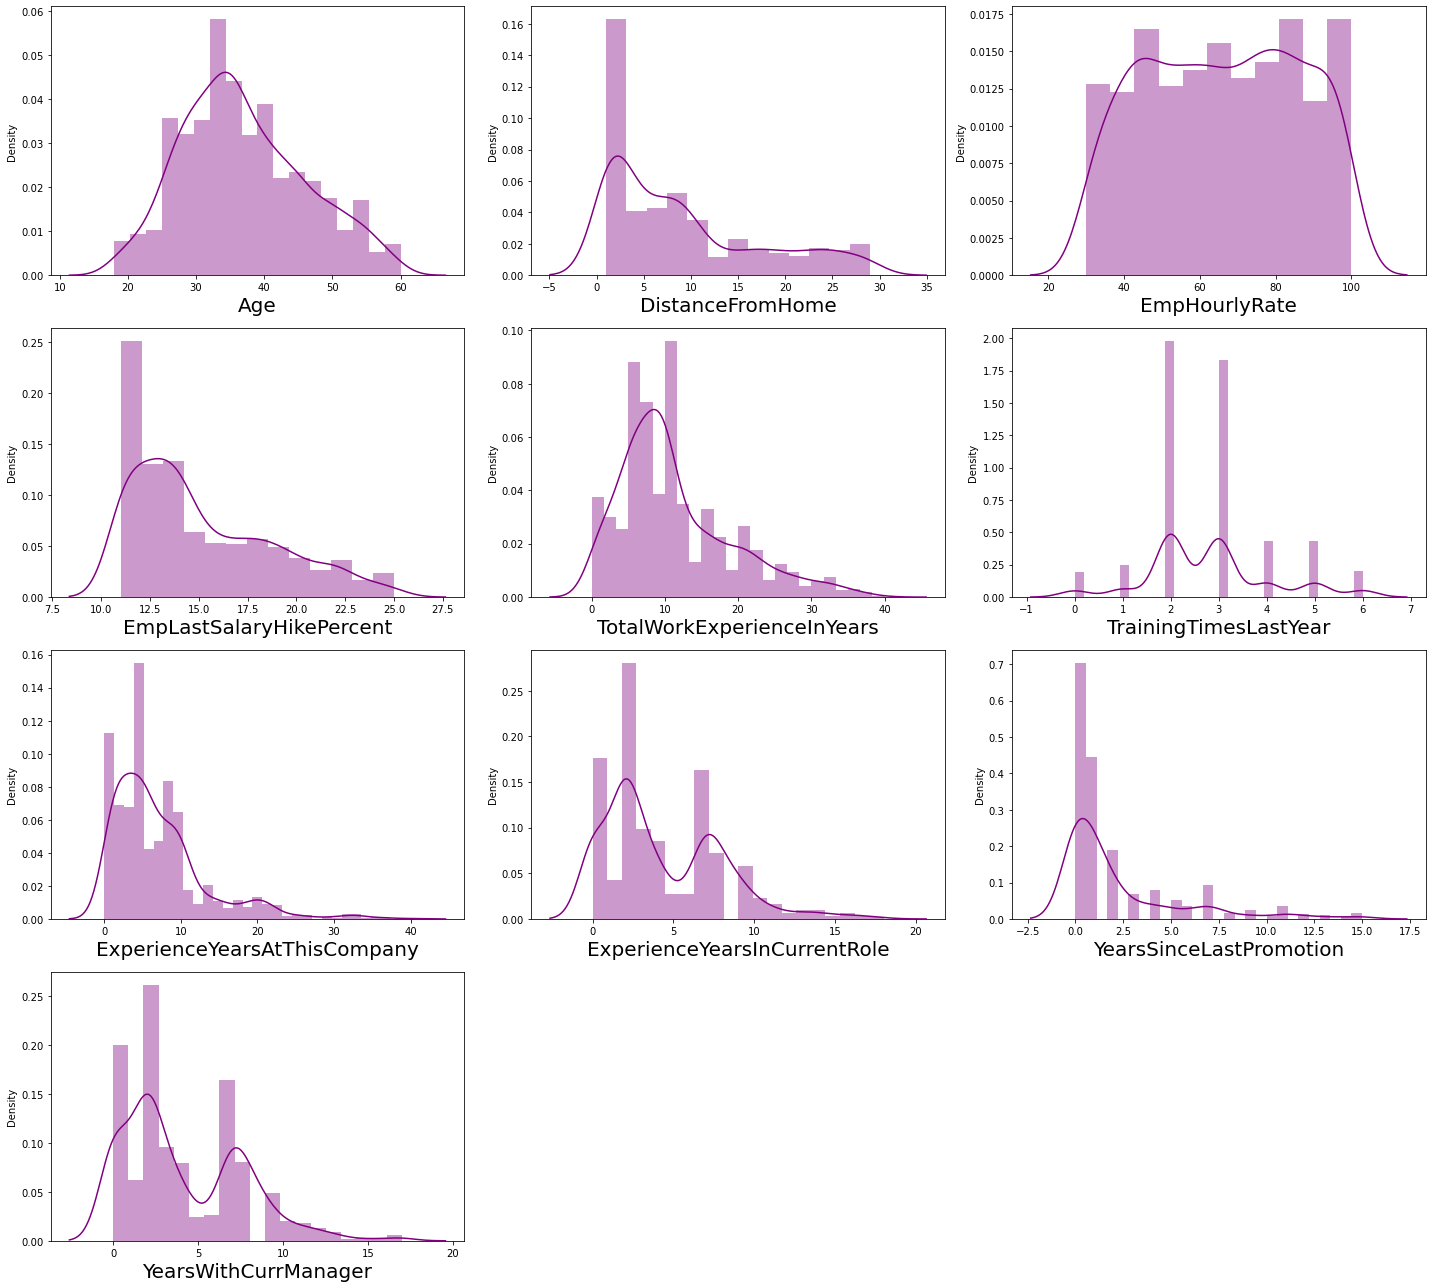

In [14]:
#Checking distribution
check = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) #Defining canvas size
plotno = 1 #Counter

for column in check: #Iteration of columns 
    if plotno<=12:    #Setting the limit
        plt.subplot(4,3,plotno) #Plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.distplot(check[column],color='purple') # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  #Assigning name to x-axis and font size is 20
    plotno+=1 #Counter increment
plt.tight_layout()
plt.show() #Used to hide the storage loction

- From the above graph it is understood that most of the continuous features have skewed distribution.
- **TotalWorkExperienceInYear**, **ExperienceYearsAtThisCompany**, **YearsSinceLasttPromotion** have skewed distribution.

### Checking for outliers

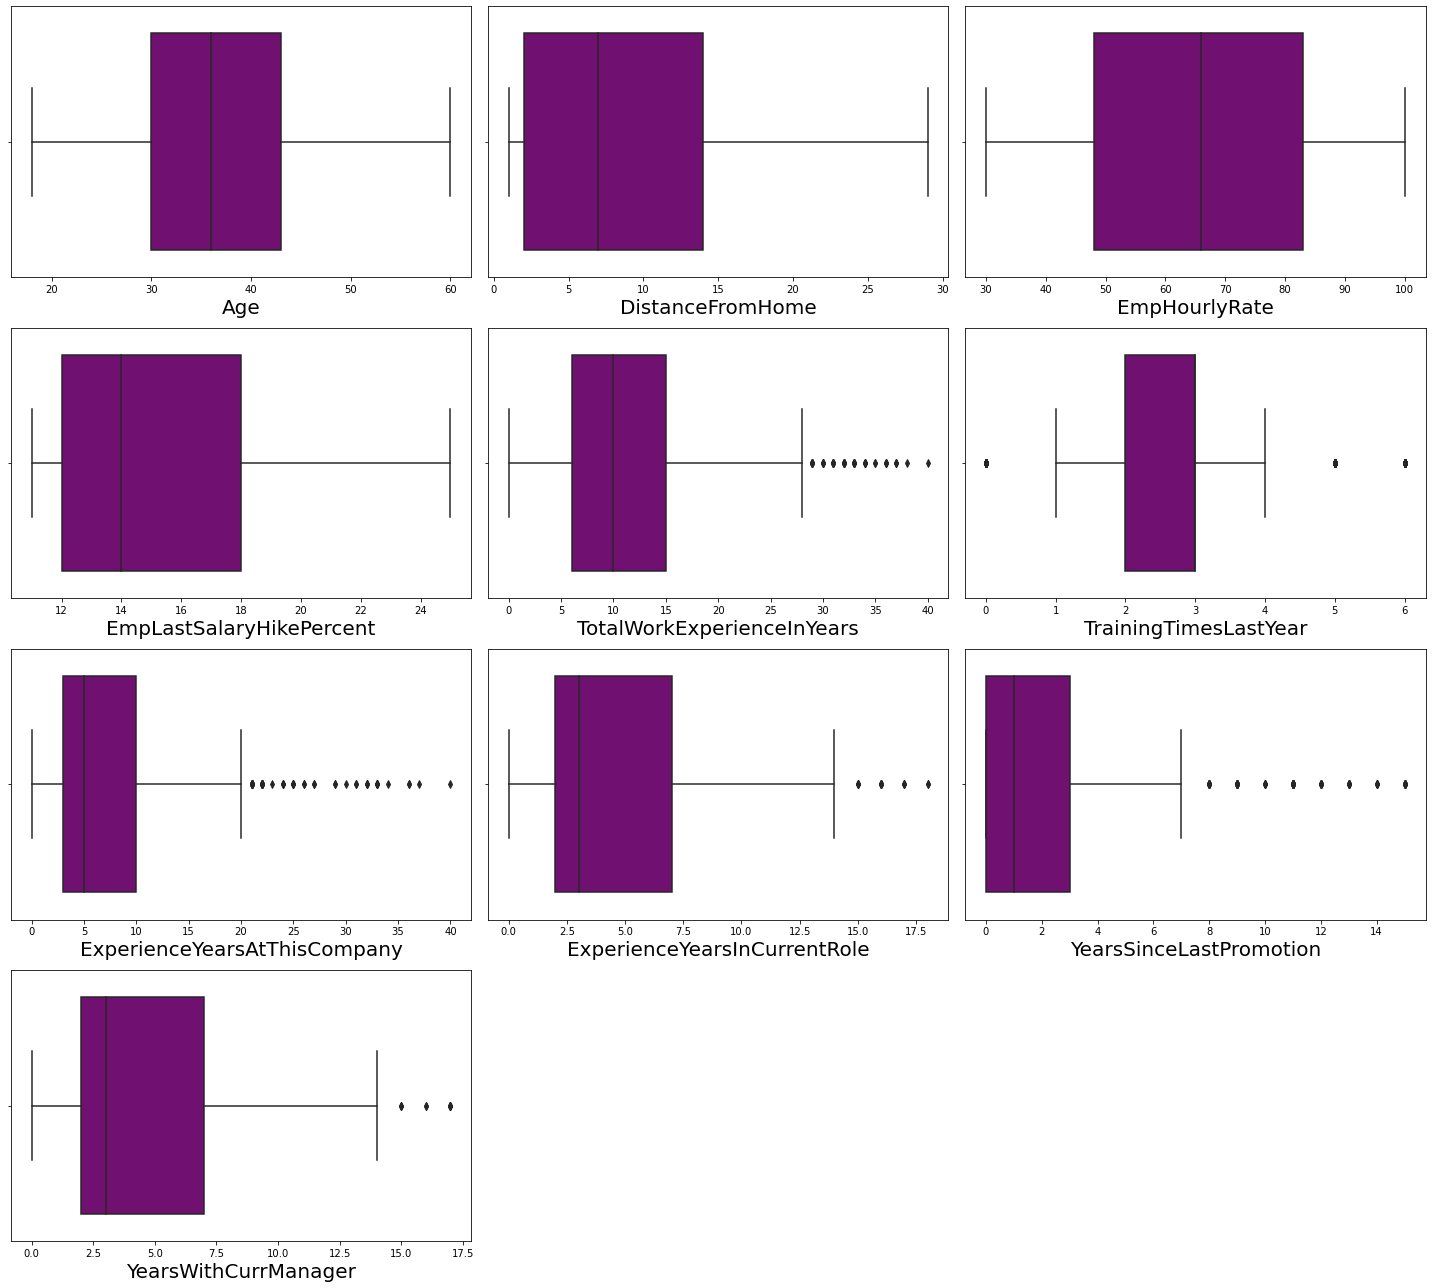

In [15]:
check = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) #Defining canvas size
plotno = 1 #Counter

for column in check: #Iteration of columns 
    if plotno<=12:    #Setting the limit
        plt.subplot(4,3,plotno) #Plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(check[column],color='purple') # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  #Assigning name to x-axis and font size is 20
    plotno+=1 #Counter increment
plt.tight_layout()
plt.show() #Used to hide the storage loction


### Handling Outliers

- Boxplot is used to check the outliers in the dataset.
- From the above plot, TotalWorkExperienceInYears, TrainingTimesLastYear,ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole,YearsSinceLastPromotion and YearsWithCurrManager has outliers but among these features only three features outliers are handled because the rest of the features are considered as discrete data.
- These are namely- **TotalWorkExperienceInYear**, **ExperienceYearsAtThisCompany**, **YearsSinceLasttPromotion**

**HANDLING OUTLIERS FOR   TotalWorkExperienceInYears**

In [16]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = data['TotalWorkExperienceInYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [17]:
# Impute outlier
data.loc[data['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()

In [18]:
# filtering data after imputation
data.loc[data['TotalWorkExperienceInYears'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


**HANDLING OUTLIERS FOR ExperienceYearsAtThisCompany**

In [19]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [20]:
# Impute outlier
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()

In [21]:
# Filtering the data
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


**HANDLING OUTLIERS FOR YearsSinceLastPromotion**

In [22]:
# use iqr because some skewed in data
iqr = stats.iqr(data['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [23]:
# impute outlier
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()

In [24]:
# Filtering data
data.loc[data['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


- **CONVERTING THE MULTICLASS CLASSIFICATION TASK INTO BINARY CLASSIFICATION TASK**

In [25]:
# Defining 'Status' as 'High Potential' or 'Low Potential'
data.PerformanceRating.replace([3,4],1,inplace=True) #high
data.PerformanceRating.replace([2],0,inplace=True)# low

### Categorical Encoding

- Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the models to give and improve the predictions.
- A structured data contains multiple columns with both numerical and categorical features.It is important to convert the categorical features into numerical features because the machine are incapable of understanding text.Instead they can only understand numbers.

In [26]:
#Getting all categorical features
list(data.select_dtypes('object'))

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

**CATEGORICAL ENCODING**
- **One hot encoding** - One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy. One-hot encoding is a common method for dealing with categorical data in machine learning.
- **Label Encoding** - Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.Each label is assigned a unique integer based on alphabetical ordering.

- **Applying One-hot encoding in 'Gender' feature.**

In [27]:
#checking value counts
data.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [28]:
# Nominal Data
data.Gender=pd.get_dummies(data.Gender,drop_first=True)

### Applying Label Encoding in rest of the features

In [29]:
## Using label encoder to convert the categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.EducationBackground=lc.fit_transform(data.EducationBackground)
data.MaritalStatus=lc.fit_transform(data.MaritalStatus)
data.EmpDepartment=lc.fit_transform(data.EmpDepartment)
data.EmpJobRole=lc.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency=lc.fit_transform(data.BusinessTravelFrequency)
data.OverTime=lc.fit_transform(data.OverTime)
data.Attrition=lc.fit_transform(data.Attrition)

In [30]:
data.head(2)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,1
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,1


### Feature Transformation

- There are various feature transformation techniques.These are namely-

**Function Transformers**
- Function transformers are the type of feature transformation technique that uses a particular function to transform the data to the normal distribution.Log Transform,Square Transform,Square Root Transform,Reciprocal Transform,Custom Transform are the types of function transformers.

**Power Transformers**
- Power Transformation techniques are the type of feature transformation technique where the power is applied to the data observations for transforming the data.Box-Cox Transform is the type of Power transformers.

**Quantile Transformers**
- Quantile transformation techniques are the type of feature transformation technique that can be applied to NY numerical data observations. This transformation technique can be implemented using sklearn.

**In this project square root transformation technique is used for better performance.**

### Square root transformation on YearsSinceLastPromotion

In [31]:
# define a function to plot a Q-Q plot
def plot_data(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

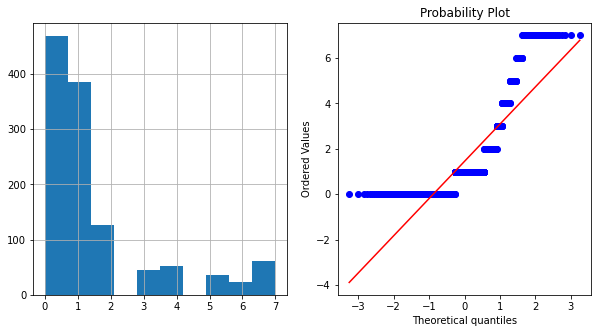

In [32]:

plot_data(data,'YearsSinceLastPromotion')

In [33]:
data['squ_YearsSinceLastPromotion'] = data.YearsSinceLastPromotion**(1/2)

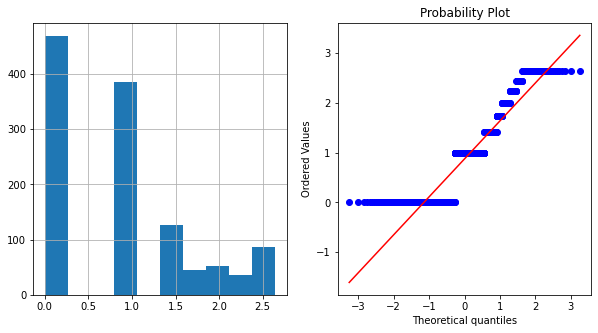

In [34]:
plot_data(data,'squ_YearsSinceLastPromotion')

### Square root transformation on TotalWorkExperienceInYears

In [35]:
# define a function to plot a Q-Q plot
def plot_data(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

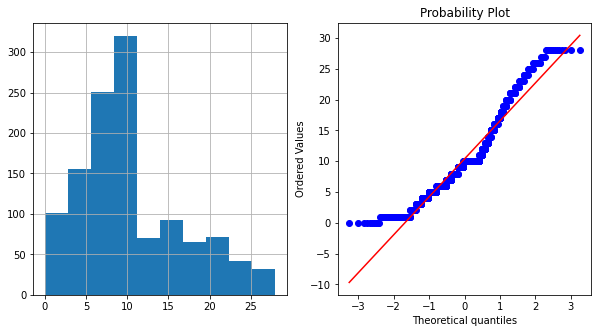

In [36]:
plot_data(data,'TotalWorkExperienceInYears')

In [37]:
data['squ_TotalWorkExperienceInYears'] = data.TotalWorkExperienceInYears**(1/2)

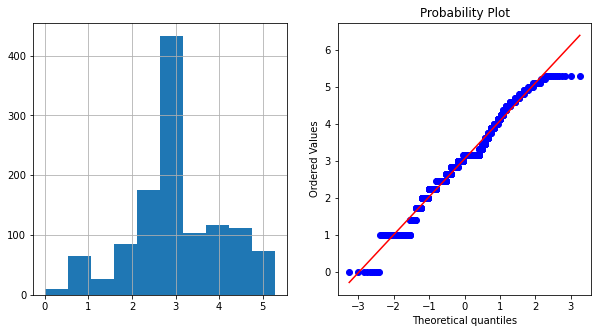

In [38]:
plot_data(data,'squ_TotalWorkExperienceInYears')

### Square root transformation on ExperienceYearsAtThisCompany

In [39]:
# define a function to plot a Q-Q plot
def plot_data(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

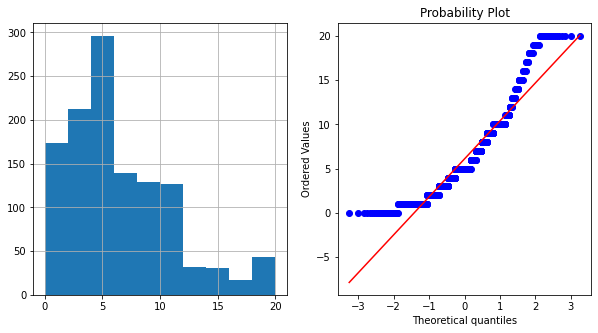

In [40]:

plot_data(data,'ExperienceYearsAtThisCompany')

In [41]:
data['squ_ExperienceYearsAtThisCompany'] = data.ExperienceYearsAtThisCompany**(1/2)

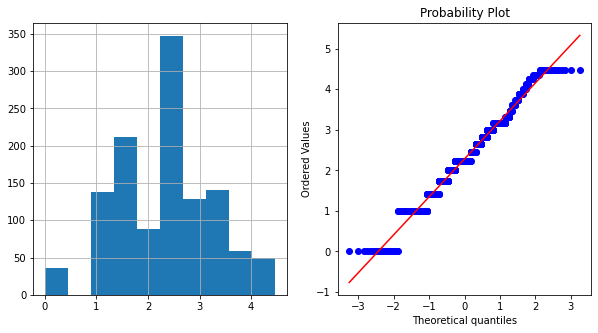

In [42]:
plot_data(data,'squ_ExperienceYearsAtThisCompany')

- From the above Q-Q plot it is concluded that the features which has higher skeweness are transformed to close to normal distribution.

### Dropping the features-

In [43]:
data.head(1)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,squ_YearsSinceLastPromotion,squ_TotalWorkExperienceInYears,squ_ExperienceYearsAtThisCompany
0,E1001000,32,1,2,2,5,13,2,10,3,...,2,10,7,0,8,0,1,0.0,3.162278,3.162278


In [44]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating',
       'squ_YearsSinceLastPromotion', 'squ_TotalWorkExperienceInYears',
       'squ_ExperienceYearsAtThisCompany'],
      dtype='object')

In [45]:

data.drop(['ExperienceYearsAtThisCompany',
          'YearsSinceLastPromotion','TotalWorkExperienceInYears','EmpNumber'],axis=1,inplace=True)

### Re-indexing the features

In [46]:
data=data.reindex(columns=['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole', 'YearsWithCurrManager', 'Attrition','squ_YearsSinceLastPromotion',
       'squ_TotalWorkExperienceInYears', 'squ_ExperienceYearsAtThisCompany','PerformanceRating'])

In [47]:
data.head(5)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,squ_YearsSinceLastPromotion,squ_TotalWorkExperienceInYears,squ_ExperienceYearsAtThisCompany,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,2,2,7,8,0,0.000000,3.162278,3.162278,1
1,47,1,2,2,5,13,2,14,4,4,...,4,2,3,7,7,0,1.000000,4.472136,2.645751,1
2,40,1,1,1,5,13,1,5,4,4,...,3,2,3,13,12,0,1.000000,4.472136,4.242641,1
3,41,1,0,0,3,8,2,10,4,2,...,2,2,2,6,6,0,1.000000,4.795832,2.236068,1
4,60,1,2,2,5,13,2,16,4,1,...,4,1,3,2,2,0,1.414214,3.162278,1.414214,1


### Feature scaling using StandardScaler:-

- In Machine Learning, StandardScaler is used to resize the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1
- StandardScaler is an important technique that is mainly performed as a preprocessing step before many machine learning models, in order to standardize the range of functionality of the input dataset.
- All the features except the target feature is not scaled.

In [48]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()  #Create Object

data[['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole', 'YearsWithCurrManager', 'Attrition',
       'squ_YearsSinceLastPromotion', 'squ_TotalWorkExperienceInYears',
       'squ_ExperienceYearsAtThisCompany']]=scaled.fit_transform(data[['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole', 'YearsWithCurrManager', 'Attrition',
       'squ_YearsSinceLastPromotion', 'squ_TotalWorkExperienceInYears',
       'squ_ExperienceYearsAtThisCompany']])

In [49]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,squ_YearsSinceLastPromotion,squ_TotalWorkExperienceInYears,squ_ExperienceYearsAtThisCompany,PerformanceRating
0,-0.541458,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.102061,0.103000,1.177978,...,1.185833,-0.622235,-1.064491,0.749766,1.100251,-0.417335,-1.057559,0.108373,0.931441,1
1,1.109888,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.591464,1.061145,1.177978,...,1.185833,-0.622235,0.365956,0.749766,0.817773,-0.417335,0.151501,1.375596,0.385060,1
2,0.339260,0.809427,-0.943112,-0.132285,1.052350,0.833426,-0.876351,-0.509693,1.061145,1.177978,...,0.255768,-0.622235,0.365956,2.410786,2.230163,-0.417335,0.151501,1.375596,2.074247,1
3,0.449349,0.809427,-1.706766,-1.500751,-0.126754,-0.218658,0.596508,0.102061,1.061145,-0.656641,...,-0.674297,-0.622235,-1.064491,0.472929,0.535296,-0.417335,0.151501,1.688755,-0.048302,1
4,2.541054,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.836165,1.061145,-1.573950,...,1.185833,-1.414051,0.365956,-0.634417,-0.594616,-0.417335,0.652311,0.108373,-0.917658,1


### checking for correlation-
- The correlation between the features are checked using the heatmap.
- +1 indicates the features are highly correlated and -1 indicates the features are poorly correlated to each other
- In this dataset, no features are correlated to each other so no features are dropped in this case.

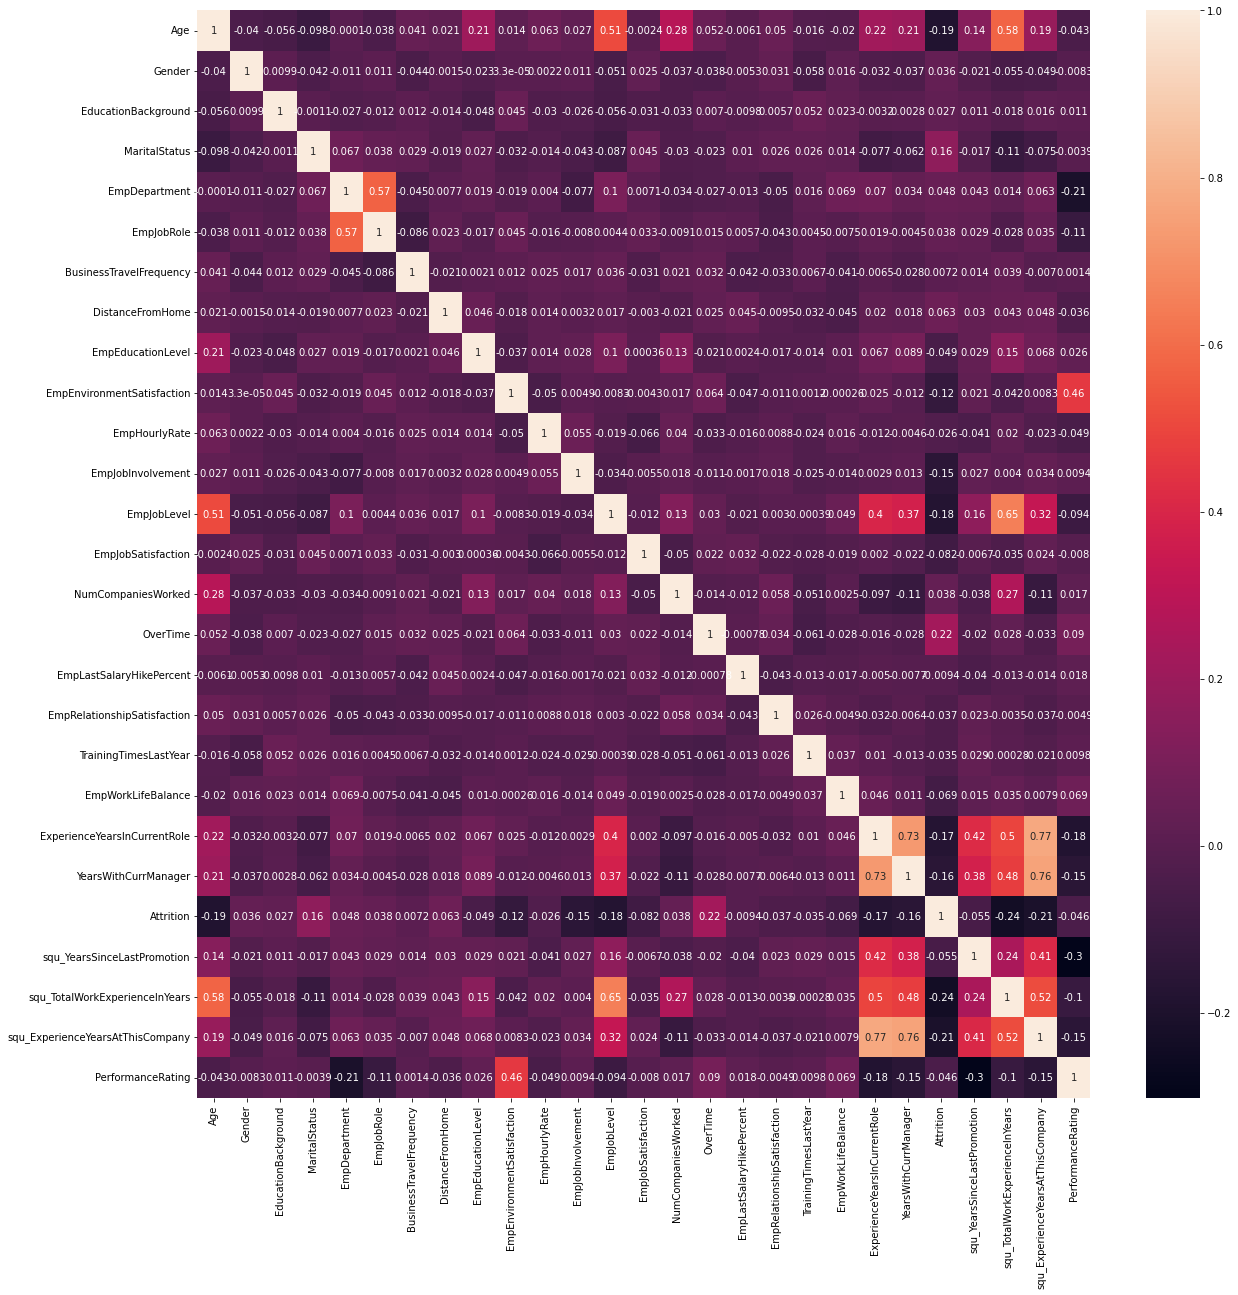

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='rocket')
plt.show()

In [51]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


In [52]:
data.head(2)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,squ_YearsSinceLastPromotion,squ_TotalWorkExperienceInYears,squ_ExperienceYearsAtThisCompany,PerformanceRating
0,-0.541458,0.809427,-0.179459,1.236181,1.05235,0.833426,0.596508,0.102061,0.103000,1.177978,...,1.185833,-0.622235,-1.064491,0.749766,1.100251,-0.417335,-1.057559,0.108373,0.931441,1
1,1.109888,0.809427,-0.179459,1.236181,1.05235,0.833426,0.596508,0.591464,1.061145,1.177978,...,1.185833,-0.622235,0.365956,0.749766,0.817773,-0.417335,0.151501,1.375596,0.385060,1


### Feature importance:

In [53]:
#drfining X and y 
X=data.iloc[0:,:-1]   # except the last feature all are take
y=data.PerformanceRating

In [54]:
#Finding out the best feature which will contribute and have good relation with target variable.
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier()

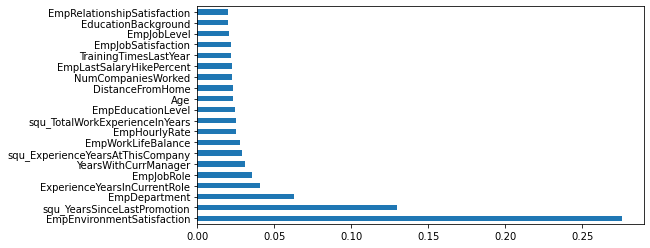

In [55]:
#plot graph of important features for better visualization
plt.figure(figsize = (8,4))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

- The important features are empenvironmentsatisfaction,squ_YearsSinceLastPromotion,EmpDepartment
- PCA is not performed in this project as there are no correlation between the features.


### SAVE PRE-PROCESSED DATA

In [56]:
data.to_csv('square1.csv')
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,squ_YearsSinceLastPromotion,squ_TotalWorkExperienceInYears,squ_ExperienceYearsAtThisCompany,PerformanceRating
0,-0.541458,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.102061,0.103000,1.177978,...,1.185833,-0.622235,-1.064491,0.749766,1.100251,-0.417335,-1.057559,0.108373,0.931441,1
1,1.109888,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.591464,1.061145,1.177978,...,1.185833,-0.622235,0.365956,0.749766,0.817773,-0.417335,0.151501,1.375596,0.385060,1
2,0.339260,0.809427,-0.943112,-0.132285,1.052350,0.833426,-0.876351,-0.509693,1.061145,1.177978,...,0.255768,-0.622235,0.365956,2.410786,2.230163,-0.417335,0.151501,1.375596,2.074247,1
3,0.449349,0.809427,-1.706766,-1.500751,-0.126754,-0.218658,0.596508,0.102061,1.061145,-0.656641,...,-0.674297,-0.622235,-1.064491,0.472929,0.535296,-0.417335,0.151501,1.688755,-0.048302,1
4,2.541054,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.836165,1.061145,-1.573950,...,1.185833,-1.414051,0.365956,-0.634417,-0.594616,-0.417335,0.652311,0.108373,-0.917658,1
